# Imports

In [2]:
import os
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

# Dataset Loader

In [3]:
# get path from config.json
with open('config.json') as f:
    config = json.load(f)

# Define paths to the image and annotation folders
train_img_folder = config['train']['train_img_folder']
train_ann_folder = config['train']['train_ann_folder']
labels_path = config['train']['label_files']

In [4]:
class DatasetLoader:
    def __init__(self, img_folder, ann_folder, target_size=(224, 224)):
        self.img_folder = img_folder
        self.ann_folder = ann_folder
        self.target_size = target_size
        self.images = []
        self.annotations = []
    
    def load_dataset(self):
        # Iterate through each annotation file in the "ann" folder
        for ann_file in os.listdir(self.ann_folder):
            if ann_file.endswith('.json'):
                # Extract image filename from annotation filename
                img_filename = ann_file[:-5]  # Remove the last 5 characters (".json")

                # Load the corresponding image using PIL Image
                img_path = os.path.join(self.img_folder, img_filename)
                img = Image.open(img_path)
                
                # Load the annotation data from the JSON file
                with open(os.path.join(self.ann_folder, ann_file), 'r') as f: # r is for read
                    ann_data = json.load(f)
                
                # Extract bounding box coordinates and class labels
                boxes = []
                labels = []

                # for each object in the annotation file
                # extract the coordinates and classTitle
                for obj in ann_data['objects']:
                    xmin, ymin = obj['points']['exterior'][0] # bottom left corner
                    xmax, ymax = obj['points']['exterior'][1] # top right corner

                    # append the coordinates and classTitle to the boxes and labels lists
                    boxes.append([xmin, ymin, xmax, ymax]) 
                    labels.append(obj['classTitle'])
                
                # For every image, append image and annotations to the lists created in the __init__ method
                self.images.append(img) # in PIL Image format
                self.annotations.append({'boxes': boxes, 'labels': labels}) # in dictionary format

        # Display the number of images loaded
        print(f"Number of images loaded: {len(self.images)}")

    def resize_images(self):
        resized_images = []
        for img in self.images:
            resized_img = img.resize(self.target_size)
            resized_images.append(resized_img)
        self.images = resized_images

    def show_image_with_boxes(self, idx=None, img_name=None):

        if idx is None:
            # Select a random image from the dataset
            # get a random index from the images list
            idx = random.randint(0, len(self.images) - 1) 
        img = self.images[idx]
        annotations = self.annotations[idx]
        
        if img_name is not None:
            # Find the index of the image with the given name
            idx = None
            for i in range(len(self.images)):
                if img_name in self.images[i].filename:
                    idx = i
                    break
            if idx is None:
                print(f"Image with filename '{img_name}' not found.")
                return
            img = self.images[idx]
            annotations = self.annotations[idx]
        # Plot the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        # Get the current Axes instance on the current figure 
        # gca stands for get current axis
        ax = plt.gca()
        # ax is used to add patches to the image (e.g. bounding boxes, labels, etc.)
        
        # Plot bounding boxes

        # for each box and label in the annotations dictionary
        for box, label in zip(annotations['boxes'], annotations['labels']):
            # unpack the box coordinates
            xmin, ymin, xmax, ymax = box
            width = xmax - xmin
            height = ymax - ymin
            # create a Rectangle patch using matplotlib.patches
            rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='b', facecolor='none')
            # add the rectangle to the Axes instance
            ax.add_patch(rect)
            # add a label to the rectangle
            plt.text(xmin, ymin, label, fontsize=10, color='r', verticalalignment='top', backgroundcolor='blue')
            #plt.text(xmin + 0.5 * width, ymin - 3, label, fontsize=10, color='r', ha='right', backgroundcolor='white')
        
        plt.axis('off')
        plt.show()

In [5]:
# train set loader
train_loader = DatasetLoader(train_img_folder, train_ann_folder)
train_loader.load_dataset()

Number of images loaded: 2246


In [6]:
# show random image with bounding boxes
#train_loader.show_image_with_boxes(img_name="vaccinium-myrtilloides-le-dcameron-b.jpg")

In [7]:
# print annotations
#print(train_loader.annotations[1])

In [8]:
#width, height = train_loader.images[0].size
#print(f"Image width: {width}, height: {height}")

# Get the Class Labels

In [9]:
def extract_class_names(annotations):
    class_names = set()  # Using a set to collect unique class names

    for annotation in annotations:
        labels = annotation['labels']
        class_names.update(labels)  # Add all labels to the set

    class_names = list(class_names)  # Convert set to list
    return class_names

In [10]:
# get class names
class_names = extract_class_names(train_loader.annotations)
# replace space with underscore
#class_names = [name.replace(' ', '_') for name in class_names]
print(class_names)
print(len(class_names))

['Strawberry leaf', 'Peach leaf', 'Tomato leaf mosaic virus', 'Soyabean leaf', 'grape leaf', 'Tomato leaf bacterial spot', 'Bell_pepper leaf', 'Tomato leaf', 'Apple leaf', 'Apple Scab Leaf', 'Potato leaf', 'Potato leaf early blight', 'Tomato leaf yellow virus', 'Tomato Septoria leaf spot', 'Corn leaf blight', 'Potato leaf late blight', 'Bell_pepper leaf spot', 'Squash Powdery mildew leaf', 'Tomato two spotted spider mites leaf', 'Tomato mold leaf', 'Cherry leaf', 'Tomato leaf late blight', 'Apple rust leaf', 'Tomato Early blight leaf', 'Corn Gray leaf spot', 'Blueberry leaf', 'Corn rust leaf', 'grape leaf black rot', 'Raspberry leaf']
29


In [12]:
# convert class names to class indices
class_indices = {cls: idx for idx, cls in enumerate(class_names)}
print(class_indices)

{'Strawberry leaf': 0, 'Peach leaf': 1, 'Tomato leaf mosaic virus': 2, 'Soyabean leaf': 3, 'grape leaf': 4, 'Tomato leaf bacterial spot': 5, 'Bell_pepper leaf': 6, 'Tomato leaf': 7, 'Apple leaf': 8, 'Apple Scab Leaf': 9, 'Potato leaf': 10, 'Potato leaf early blight': 11, 'Tomato leaf yellow virus': 12, 'Tomato Septoria leaf spot': 13, 'Corn leaf blight': 14, 'Potato leaf late blight': 15, 'Bell_pepper leaf spot': 16, 'Squash Powdery mildew leaf': 17, 'Tomato two spotted spider mites leaf': 18, 'Tomato mold leaf': 19, 'Cherry leaf': 20, 'Tomato leaf late blight': 21, 'Apple rust leaf': 22, 'Tomato Early blight leaf': 23, 'Corn Gray leaf spot': 24, 'Blueberry leaf': 25, 'Corn rust leaf': 26, 'grape leaf black rot': 27, 'Raspberry leaf': 28}


# Create Label files

In [13]:
class Labels:
    def __init__(self, images, annotations, ann_folder, img_folder):
        self.images = images
        self.annotations = annotations
        self.ann_folder = ann_folder
        self.img_folder = img_folder
    
    # create labels folder containing .txt files
    # each .txt file contains the class label and bounding box coordinates
    def create_labels(self, labels_folder, class_indices= class_indices):
        for ann_file, img_, ann in zip(os.listdir(self.ann_folder), os.listdir(self.img_folder), self.annotations):
            print(img_)
            # Extract image filename from the img_folder
            if img_.endswith('.jpg'):
                img_filename = img_[:-4]  # Remove the last 4 characters (".jpg")
            elif img_.endswith('.png'):
                img_filename = img_[:-4]  # Remove the last 4 characters (".png")
            elif img_.endswith('.jpeg'):
                img_filename = img_[:-5]
            else:
                img_filename = img_[:-4]

            # Create a new .txt file with the same name as the image
            filename = img_filename + '.txt'
            print("-> " , img_filename)
            with open(os.path.join(labels_folder, filename), 'w') as f:
                for box, label in zip(ann['boxes'], ann['labels']):
        
                    # get actual image size from jpg file
                    img = Image.open(os.path.join(self.img_folder, img_))
                    img_width, img_height = img.size
                    
                    # unpack the box coordinates
                    xmin, ymin, xmax, ymax = box

                    # calculate the center of the box
                    x_center = (xmin + xmax) / 2
                    y_center = (ymin + ymax) / 2

                    # calculate the width and height of the box
                    width = xmax - xmin
                    height = ymax - ymin

                    # normalize the coordinates by the image width and height
                    x_center /= img_width
                    y_center /= img_height
                    width /= img_width
                    height /= img_height
                    
                    # get class index from class_indices dictionary
                    label = class_indices[label]
                    
                    # print the coordinates and class label t
                    print(f"{label} {x_center} {y_center} {width} {height}")
                    # write the label and normalized coordinates to the file
                    f.write(f"{label} {x_center} {y_center} {width} {height}\n")
        print("UPDATE: Labels created succesfully!")

# For Train

In [14]:
pp = Labels(train_loader.images, train_loader.annotations, train_ann_folder, train_img_folder)

In [15]:
pp.create_labels(labels_path, class_indices= class_indices)

0.jpg
->  0
16 0.30227272727272725 0.22606382978723405 0.35 0.2925531914893617
16 0.7704545454545455 0.2898936170212766 0.38636363636363635 0.22872340425531915
16 0.5113636363636364 0.36569148936170215 0.1590909090909091 0.1622340425531915
16 0.23636363636363636 0.511968085106383 0.4636363636363636 0.17819148936170212
16 0.65 0.6436170212765957 0.3181818181818182 0.2925531914893617
16 0.6681818181818182 0.44813829787234044 0.2636363636363636 0.08776595744680851
0000.jpg
->  0000
16 0.5300925925925926 0.43878600823045266 0.4729938271604938 0.7592592592592593
16 0.7814429012345679 0.6450617283950617 0.4224537037037037 0.7088477366255144
00009.jpg
->  00009
11 0.45407098121085593 0.415625 0.5198329853862212 0.80625
0008003-strawberry-leaf-veiner-large.jpg
->  0008003-strawberry-leaf-veiner-large
0 0.704296875 0.419921875 0.26171875 0.19296875
0 0.820703125 0.2828125 0.22734375 0.2859375
0 0.8421875 0.537890625 0.21875 0.25859375
0 0.687890625 0.640234375 0.22890625 0.28984375
0 0.6984375 

# For test

In [16]:
# do for test
test_img_folder = config['test']['test_img_folder']
test_ann_folder = config['test']['test_ann_folder']
labels_path = config['test']['label_files']

In [17]:
# test set loader
test_loader = DatasetLoader(test_img_folder, test_ann_folder)
test_loader.load_dataset()

Number of images loaded: 231


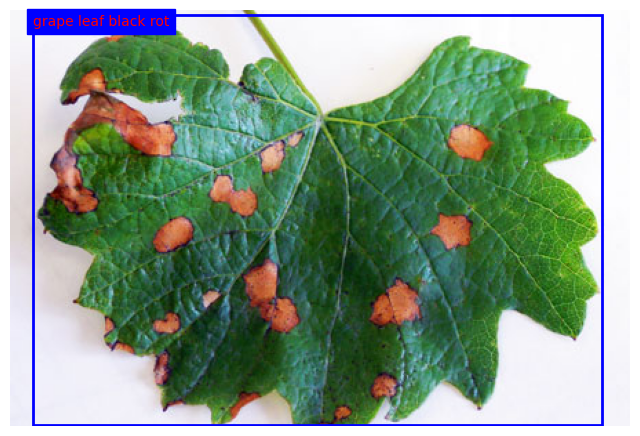

In [25]:
# show random image with bounding boxes
test_loader.show_image_with_boxes(img_name = "5-29black-rot-chardRR")

In [21]:
# preprocess test set
pp = Labels(test_loader.images, test_loader.annotations, test_ann_folder, test_img_folder)

In [22]:
pp.create_labels(labels_path)

%2320+Bacterial+Spot+and+Speck.jpg
->  %2320+Bacterial+Spot+and+Speck
5 0.2453125 0.4111111111111111 0.36354166666666665 0.2777777777777778
0.jpg
->  0
13 0.6645833333333333 0.5402777777777777 0.3125 0.325
13 0.31354166666666666 0.5402777777777777 0.34375 0.325
00.jpg
->  00
16 0.528125 0.3958333333333333 0.6895833333333333 0.6472222222222223
16 0.609375 0.8444444444444444 0.69375 0.29444444444444445
16 0.140625 0.42777777777777776 0.27708333333333335 0.4666666666666667
16 0.8958333333333334 0.18333333333333332 0.20416666666666666 0.3611111111111111
16 0.9041666666666667 0.4486111111111111 0.1875 0.3472222222222222
16 0.17291666666666666 0.7458333333333333 0.3125 0.3638888888888889
000.jpg
->  000
16 0.5830078125 0.4830729166666667 0.673828125 0.9635416666666666
0000.jpg
->  0000
4 0.472 0.483 0.938 0.912
00pe.jpg
->  00pe
1 0.5145833333333333 0.385 0.9152777777777777 0.692
01.jpg
->  01
16 0.75 0.6127348643006263 0.21786833855799373 0.511482254697286
02.-Rust-2017-207u24s.jpg
->  02.-

# Train

don't run!

In [1]:
!python train.py --img 416 --batch 15 --epochs 20 --data data.yaml --cfg models/yolov5s.yaml --weights '' --name leaf_detect

^C


In [ ]:
!python detect.py --source data/images --weights runs/train/leaf_detect/weights/best.pt --conf 0.4